In [1]:
import numpy as np
import pandas as pd

from dataset import get_age_dataset
from trainer import Trainer
from inference import create_label, sum_label
from loss import LabelSmoothing, F1_Loss

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models

In [4]:
## hyperparameters
lr = 0.00006
batch_size = 64
num_epoch = 40
target = 'age'
split = 20

In [6]:
df_train1 = pd.read_csv('/opt/ml/code/df/df_megaasian_2000.csv')
df_train2 = pd.read_csv('/opt/ml/code/df/df_age_train_20.csv')[['path','age']]

df_train = pd.concat([df_train1, df_train2])

In [ ]:
## prepare dataset

#df_train = pd.read_csv('df_megaasian_2000.csv')
df_valid = pd.read_csv('/opt/ml/code/df/df_age_valid_20.csv')
df_test = pd.read_csv('/opt/ml/input/data/eval/info.csv')

train_dataset, valid_dataset, test_dataset = get_age_dataset(df_train1, df_train2, df_valid, df_test, target=target)

NameError: name 'df_test' is not defined

In [5]:
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

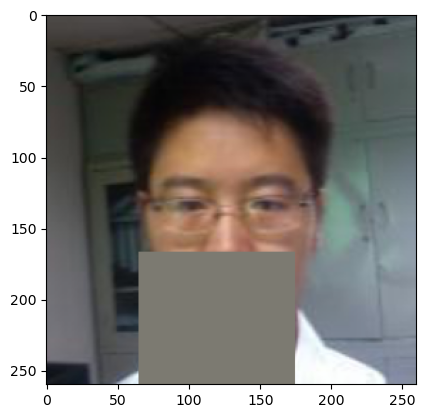

In [6]:
inputs = train_dataset[np.random.randint(0, len(train_dataset)-1)][0].unsqueeze(0)

imshow(inputs.squeeze(0).cpu(), title=None)
plt.show()

In [7]:
target = 'age' #train_dataset.target
weight = df_train[target].value_counts().sort_index().to_numpy()
print('count :', weight)
weight = 1. / weight
samples_weight = np.array([weight[t] for t in df_train[target]])
samples_weight = torch.from_numpy(samples_weight)

count : [8727 7159 4104]


In [8]:
from torch.utils.data.sampler import WeightedRandomSampler
sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))

In [18]:
## prepare model (resnet)

device = 'cuda'
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [9]:
## prepare model (efficient_net)

from efficientnet_pytorch import EfficientNet

device = 'cuda'
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes=3)
model.to(device)

criterion = LabelSmoothing(0.1) #nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

Loaded pretrained weights for efficientnet-b1


In [10]:
## prepare Dataloader

dataloaders = {'train' : DataLoader(train_dataset, batch_size=batch_size, num_workers=3, drop_last=True, shuffle=True),
               'valid' : DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=3, drop_last=False)}
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=3, drop_last=False)

In [11]:
## train

trainer = Trainer('/opt/ml/code/save')

In [12]:
# # to change lr manually:

# for g in optimizer.param_groups:
#     g['lr'] = 0

In [13]:
# Baseline : resnet : valid loss:0.3205, Acc:0.9113, F1:0.82

In [14]:
#model.load_state_dict(torch.load('/opt/ml/code/save/age/6e5_9110.pt'))

trainer.train(model, dataloaders, criterion, optimizer, device, num_epochs=num_epoch, scheduler=None, save_name='effnet_adrand', sub_dir=target)

Epoch 1/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.50it/s]


train Loss: 0.8215 Acc: 0.6762 F1: 0.6454912551821305


100%|██████████| 74/74 [00:09<00:00,  7.59it/s]


valid Loss: 0.5472 Acc: 0.8489 F1: 0.7485601808052139

Epoch 2/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.51it/s]


train Loss: 0.6173 Acc: 0.8034 F1: 0.783004401657904


100%|██████████| 74/74 [00:09<00:00,  7.47it/s]


valid Loss: 0.5367 Acc: 0.8548 F1: 0.7644556398903163

Epoch 3/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.50it/s]


train Loss: 0.5723 Acc: 0.8298 F1: 0.8130493691437319


100%|██████████| 74/74 [00:09<00:00,  7.58it/s]


valid Loss: 0.5334 Acc: 0.8557 F1: 0.765499857111308

Epoch 4/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.51it/s]


train Loss: 0.5478 Acc: 0.8449 F1: 0.8303755700921996


100%|██████████| 74/74 [00:09<00:00,  7.51it/s]


valid Loss: 0.5423 Acc: 0.8571 F1: 0.7714105066924831

Epoch 5/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.50it/s]


train Loss: 0.5222 Acc: 0.8620 F1: 0.8506717060367729


100%|██████████| 74/74 [00:09<00:00,  7.63it/s]


valid Loss: 0.5348 Acc: 0.8690 F1: 0.7851731724097825

Epoch 6/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.50it/s]


train Loss: 0.5017 Acc: 0.8768 F1: 0.8669622768291404


100%|██████████| 74/74 [00:09<00:00,  7.56it/s]


valid Loss: 0.5776 Acc: 0.8616 F1: 0.781269509026222

Epoch 7/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.51it/s]


train Loss: 0.4842 Acc: 0.8888 F1: 0.8819867412372742


100%|██████████| 74/74 [00:09<00:00,  7.49it/s]


valid Loss: 0.5783 Acc: 0.8707 F1: 0.7920621730932244

Epoch 8/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.50it/s]


train Loss: 0.4707 Acc: 0.8977 F1: 0.8919365996408123


100%|██████████| 74/74 [00:09<00:00,  7.57it/s]


valid Loss: 0.5884 Acc: 0.8747 F1: 0.7975624248270582

Epoch 9/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.51it/s]


train Loss: 0.4527 Acc: 0.9107 F1: 0.9067974969323872


100%|██████████| 74/74 [00:09<00:00,  7.59it/s]


valid Loss: 0.5660 Acc: 0.8853 F1: 0.8093185316960163

Epoch 10/30
----------


100%|██████████| 312/312 [02:04<00:00,  2.50it/s]


train Loss: 0.4412 Acc: 0.9178 F1: 0.9142280652125576


100%|██████████| 74/74 [00:09<00:00,  7.49it/s]


valid Loss: 0.5816 Acc: 0.8823 F1: 0.8066415226484157

Epoch 11/30
----------


100%|██████████| 312/312 [02:05<00:00,  2.49it/s]


train Loss: 0.4336 Acc: 0.9232 F1: 0.9204796019535375


100%|██████████| 74/74 [00:09<00:00,  7.55it/s]


valid Loss: 0.5998 Acc: 0.8813 F1: 0.8050423012404856

Epoch 12/30
----------


  2%|▏         | 7/312 [00:03<02:45,  1.84it/s]
Traceback (most recent call last):
  File "/opt/ml/anaconda3/envs/pytorch/lib/python3.9/multiprocessing/queues.py", line 251, in _feed
    send_bytes(obj)
  File "/opt/ml/anaconda3/envs/pytorch/lib/python3.9/multiprocessing/connection.py", line 205, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/ml/anaconda3/envs/pytorch/lib/python3.9/multiprocessing/connection.py", line 416, in _send_bytes
    self._send(header + buf)
  File "/opt/ml/anaconda3/envs/pytorch/lib/python3.9/multiprocessing/connection.py", line 373, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/opt/ml/anaconda3/envs/pytorch/lib/python3.9/multiprocessing/queues.py", line 251, in _feed
    send_bytes(obj)
  File "/opt/ml/anaconda3/envs/pytorch/lib/python3.9/multiprocessing/connection.py", line 205, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/ml/

KeyboardInterrupt: 

In [21]:
## inference

# model.load_state_dict(torch.load('/opt/ml/code/save/label/b1_best_8209.pt'))
# df_submit = create_label(model, test_dataloader, df_test.copy(), device)

# model.load_state_dict(torch.load('/opt/ml/code/save/age/b1_best_8209.pt'))
# df_submit = create_label(model, test_dataloader, df_test.copy(), device, target='age')

# model.load_state_dict(torch.load('/opt/ml/code/save/mask/6e5_9987.pt'))
# df_submit = create_label(model, test_dataloader, df_submit, device, target='mask')

# model.fc = nn.Linear(model.fc.in_features, 2).cuda()
# model.load_state_dict(torch.load('/opt/ml/code/save/gender/6e5_9851.pt'))
# df_submit = create_label(model, test_dataloader, df_submit, device, target='gender')

df_submit = sum_label(df_submit)
df_submit.to_csv('submit.csv', index=False)

In [22]:
df_submit

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,13
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,2
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,14
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12
...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,1
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,4
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,9
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,1


In [ ]:
from utils import imshow
batch = next(iter(dataloaders['train']))
imshow(batch[0])
print(batch[1])

In [ ]:
next(iter(dataloaders['train']))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

model.eval()
y_true = []
y_pred = []
for inputs, labels in dataloaders['valid']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(preds.tolist())

mtx = confusion_matrix(y_true, y_pred)
print(mtx)


In [ ]:
import matplotlib.pyplot as plt

label_ = list(range(18))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(mtx, cmap='Blues', vmax=100, vmin=-20)

ax.set_xticks(np.arange(len(label_)))
ax.set_yticks(np.arange(len(label_)))
# ... and label them with the respective list entries
ax.set_xticklabels(label_)
ax.set_yticklabels(label_)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(label_)):
    for j in range(len(label_)):
        if mtx[i, j]:
            text = ax.text(j, i, mtx[i, j],
                           ha="center", va="center", color="w", size=10)
ax.set_xlabel('Prediction')
ax.set_ylabel('True Label')
ax.set_title("Confusion mtx")
fig.tight_layout()
plt.show()